# Bài Tập

In [1]:
%matplotlib inline
import numpy as np
import math
from scipy import stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

### Bài 1: Tạo quần thể mô phỏng

Bạn hãy tạo một mẫu gồm 10000 phần tử mô phỏng chiều cao của nam thanh niên có giá trị từ 120cm - 200cm. Bạn hãy lưu kết quả vào biến **POP**.

Tính:
a. Chiều cao trung bình (kỳ vọng) của quần thể và độ lệch chuẩn về chiều cao của quần thể.

b. Tính tỷ lệ người cao trong quần thể, biết rằng thanh niên có chiều cao từ 180 trở lên được gọi là cao.

c. Vẽ histogram về chiều cao của quần thể. Theo bạn quần thể có phân phối chuẩn hay không?

d. Thử vẽ histogram và đồ thị hàm mật độ của phân phối chuẩn sử dụng tham số loc và scale bằng với kỳ vọng và độ lệch chuẩn của quần thể.

Câu a:
Chiều cao trung bình(Kỳ vọng) của quần thể: 160.21 cm
Độ lệch chuẩn về chiều cao của quần thể: 23.05 cm
Câu b:
Tỉ lệ người cao trong quần thể:  0.25
Câu c


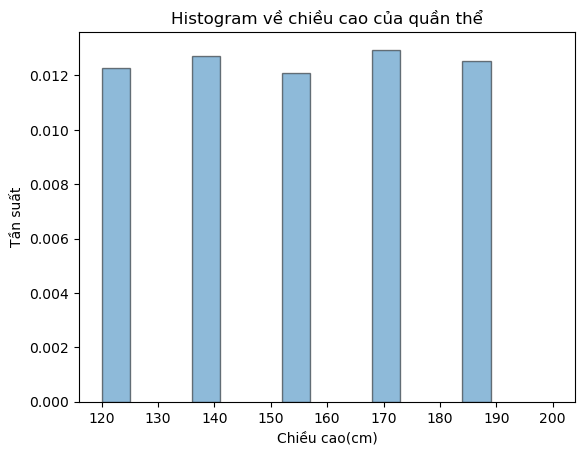

In [2]:
sample_size = 10000;
min_height = 120;
max_height = 200

POP = np.random.uniform(min_height, max_height, sample_size)

##Câu a: Chiều cao trung bình
print("Câu a:")
mean_height = np.mean(POP).round(2)
std_height = np.std(POP).round(2)

print(f"Chiều cao trung bình(Kỳ vọng) của quần thể: {mean_height} cm")
print(f"Độ lệch chuẩn về chiều cao của quần thể: {std_height} cm")
##Câu b: 
print("Câu b:")
tall_count = np.sum(POP>=180)
tall_ratio = tall_count/sample_size
print(f"Tỉ lệ người cao trong quần thể: {tall_ratio: .2f}")

##Câu c
print("Câu c")
offset=5/2;
plt.hist(POP, bins=5, density=True, alpha=0.5, edgecolor='black', width=5)
plt.xlabel("Chiều cao(cm)")
plt.ylabel("Tần suất")
plt.title("Histogram về chiều cao của quần thể")

plt.show()

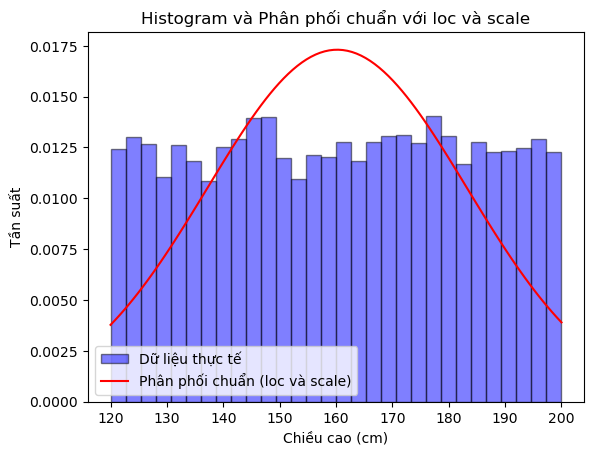

In [3]:
# Vẽ histogram của mẫu
plt.hist(POP, bins=30, density=True, alpha=0.5, color='b', edgecolor='black', label='Dữ liệu thực tế')

# Tạo dữ liệu phân phối chuẩn với cùng giá trị kỳ vọng và độ lệch chuẩn của mẫu
x = np.linspace(min_height, max_height, 100)
normal_dist = norm.pdf(x, loc=mean_height, scale=std_height)

# Vẽ phân phối chuẩn sử dụng loc và scale tương ứng với kỳ vọng và độ lệch chuẩn
normal_dist_params = norm.pdf(x, loc=mean_height, scale=std_height)

# Vẽ đồ thị hàm mật độ của phân phối chuẩn
plt.plot(x, normal_dist_params, 'r-', label='Phân phối chuẩn (loc và scale)')

plt.xlabel('Chiều cao (cm)')
plt.ylabel('Tần suất')
plt.title('Histogram và Phân phối chuẩn với loc và scale')
plt.legend()

# Hiển thị biểu đồ
plt.show()

### Bài 2: Lấy mẫu cỡ 20

Bạn hãy lấy một mẫu kích thước 20 phần từ. Tính:

a. Trung bình mẫu, và độ lệch chuẩn của mẫu

b. Tỷ lệ người cao của mẫu

c. Vẽ histogram của mẫu

d. Thử vẽ đồ thị hàm mật độ của phân phối chuẩn với tham số loc và scale bằng với giá trị trung bình và độ lệch chuẩn và chiều cao của mẫu. Bạn có nhận xét gì không?

Trung bình của mẫu là: 166.05
Độ lệch chuẩn của mẫu: 20.1
Tỉ lệ người cao của mẫu:  8.30


Text(0.5, 1.0, 'Histogram của mẫu')

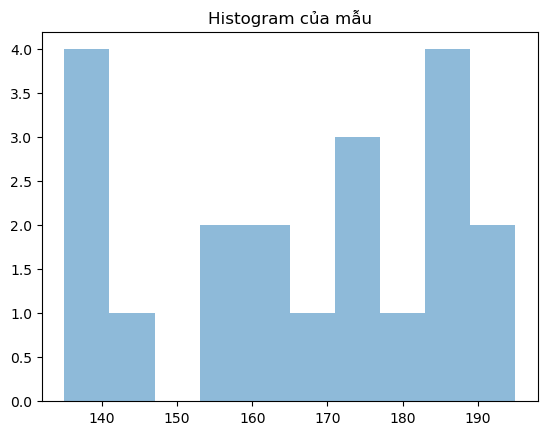

In [13]:
## Câu a
sample_size = 20
min_height = 120;
max_height = 200

Pop = np.random.randint(min_height, max_height, sample_size)

mean_pop = Pop.mean();
std_pop = Pop.std().round(2);
print(f"Trung bình của mẫu là: {mean_pop}");
print(f"Độ lệch chuẩn của mẫu: {std_pop}");

ti_le = mean_pop/sample_size;
print(f"Tỉ lệ người cao của mẫu: {ti_le: .2f}")

plt.hist(Pop, alpha=0.5);
plt.title("Histogram của mẫu")

### Bài 3: Lấy mẫu cỡ 100

Lặp lại thí nghiệm bài 2 với cỡ mẫu là 100

Trung bình : 159.33
Độ lệch chuẩn của mẫu: 23.95
Tỉ lệ người cao của mẫu:  1.59


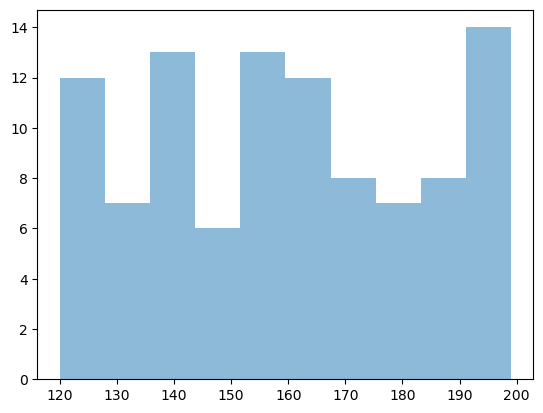

In [17]:
min_height = 120;
max_height = 200;
sample_size = 100;

pop = np.random.randint(min_height, max_height, sample_size);
mean_pop = pop.mean().round(2);
std_pop = pop.std().round(2);
ti_le = mean_pop/sample_size;
print(f"Trung bình : {mean_pop}");
print(f"Độ lệch chuẩn của mẫu: {std_pop}")
print(f"Tỉ lệ người cao của mẫu: {ti_le: .2f}");

plt.hist(pop, alpha=0.5);


### Bài 4: Khảo sát phân phối của trung bình mẫu

a. Thực hiện bài 2 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.

b. Thực hiện bài 3 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.

c. Vẽ histogram của hai câu a, b trong cùng một hình để so sánh. Theo bạn hình dạng của histogram thay đổi nói lên điều gì?

Gợi ý: tạo một danh sách rỗng để chứa các trung bình mẫu tính được, sử dụng hàm append() để thêm giá trị trung bình vào danh sách sau mỗi lần tính.

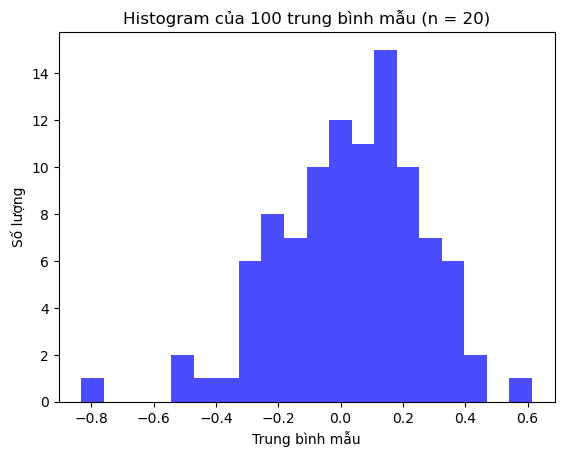

In [3]:
import numpy as np
import matplotlib.pyplot as plt

sample_means_a = []  # Danh sách để lưu trữ 100 trung bình mẫu

# Thực hiện bài 2 100 lần và tính trung bình mẫu mỗi lần
for _ in range(100):
    sample = np.random.normal(size=20)
    sample_mean = np.mean(sample)
    sample_means_a.append(sample_mean)

# Vẽ histogram của trung bình mẫu
plt.hist(sample_means_a, bins=20, color='blue', alpha=0.7)
plt.xlabel("Trung bình mẫu")
plt.ylabel("Số lượng")
plt.title("Histogram của 100 trung bình mẫu (n = 20)")
plt.show()


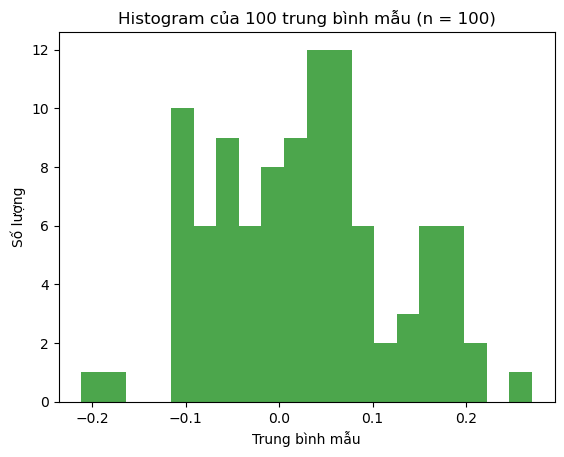

In [4]:
sample_means_b = []  # Danh sách để lưu trữ 100 trung bình mẫu

# Thực hiện bài 3 100 lần và tính trung bình mẫu mỗi lần
for _ in range(100):
    sample = np.random.normal( size=100)
    sample_mean = np.mean(sample)
    sample_means_b.append(sample_mean)

# Vẽ histogram của trung bình mẫu
plt.hist(sample_means_b, bins=20, color='green', alpha=0.7)
plt.xlabel("Trung bình mẫu")
plt.ylabel("Số lượng")
plt.title("Histogram của 100 trung bình mẫu (n = 100)")
plt.show()


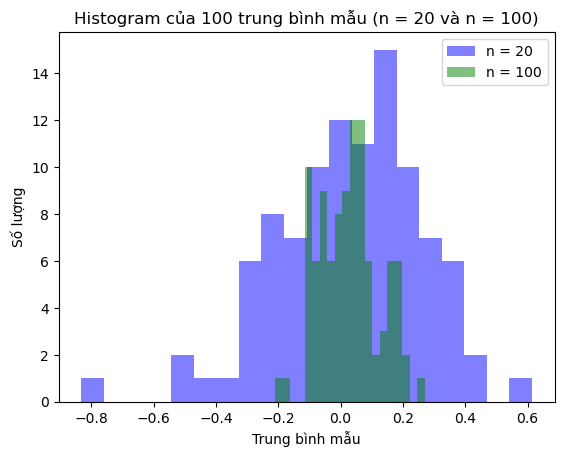

In [5]:
plt.hist(sample_means_a, bins=20, color='blue', alpha=0.5, label='n = 20')
plt.hist(sample_means_b, bins=20, color='green', alpha=0.5, label='n = 100')
plt.xlabel("Trung bình mẫu")
plt.ylabel("Số lượng")
plt.title("Histogram của 100 trung bình mẫu (n = 20 và n = 100)")
plt.legend()
plt.show()

### Bài 5: Khảo sát tỷ lệ mẫu

a. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 100. Vẽ histogram tỷ lệ người cao của các mẫu

b. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 500. Vẽ histogram tỷ lệ người cao của các mẫu

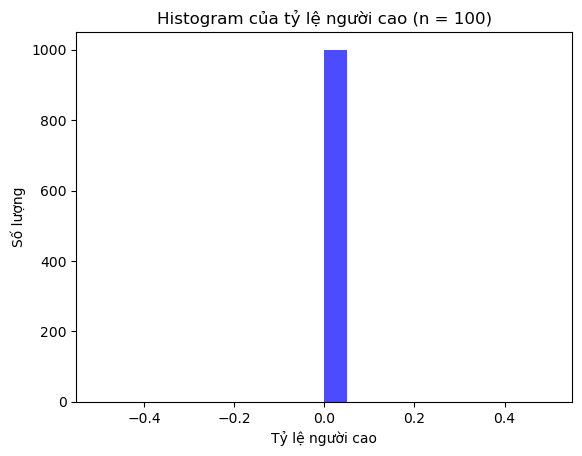

In [6]:
import numpy as np
import matplotlib.pyplot as plt

threshold = 180

tall_percentages_a = []  # Danh sách để lưu trữ tỷ lệ người cao

# Thực hiện lấy mẫu 1000 lần với kích thước mẫu là 100
for _ in range(1000):
    sample = np.random.normal(size=100)
    tall_count = np.sum(sample > threshold)
    tall_percentage = (tall_count / 100) * 100  # Tính tỷ lệ người cao
    tall_percentages_a.append(tall_percentage)

# Vẽ histogram của tỷ lệ người cao
plt.hist(tall_percentages_a, bins=20, color='blue', alpha=0.7)
plt.xlabel("Tỷ lệ người cao")
plt.ylabel("Số lượng")
plt.title("Histogram của tỷ lệ người cao (n = 100)")
plt.show()


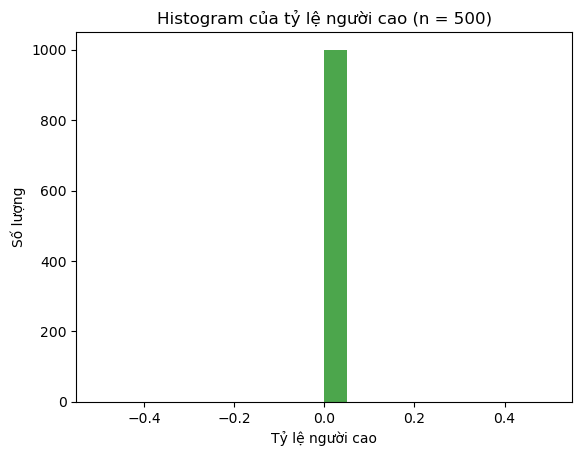

In [7]:
tall_percentages_b = []  # Danh sách để lưu trữ tỷ lệ người cao

# Thực hiện lấy mẫu 1000 lần với kích thước mẫu là 500
for _ in range(1000):
    sample = np.random.normal(size=500)
    tall_count = np.sum(sample > threshold)
    tall_percentage = (tall_count / 500) * 100  # Tính tỷ lệ người cao
    tall_percentages_b.append(tall_percentage)

# Vẽ histogram của tỷ lệ người cao
plt.hist(tall_percentages_b, bins=20, color='green', alpha=0.7)
plt.xlabel("Tỷ lệ người cao")
plt.ylabel("Số lượng")
plt.title("Histogram của tỷ lệ người cao (n = 500)")
plt.show()


### Bài 6: Khảo sát phương sai mẫu

Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 100. Vẽ histogram đại lượng phương sai của các mẫu (Phương sai bằng bình phương độ lệch chuẩn)

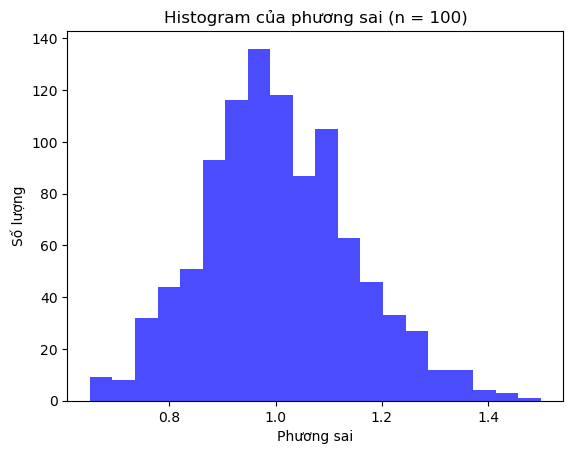

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sample_variances = []  # Danh sách để lưu trữ phương sai

# Thực hiện lấy mẫu 1000 lần với kích thước mẫu là 100
for _ in range(1000):
    sample = np.random.normal(size=100)
    sample_variance = np.var(sample, ddof=1)  # Tính phương sai
    sample_variances.append(sample_variance)

# Vẽ histogram của đại lượng phương sai
plt.hist(sample_variances, bins=20, color='blue', alpha=0.7)
plt.xlabel("Phương sai")
plt.ylabel("Số lượng")
plt.title("Histogram của phương sai (n = 100)")
plt.show()


### Bài 7:  Bài Tập Ước Lượng 

Khảo sát cân nặng (kg) của gà khi xuất chuồng, người ta cân một số con và có kết quả như sau:

> 2.1, 1.8, 2.0, 2.3, 1.7, 1.5, 2.0, 2.2, 1.8

Giả sử cân nặng của gà là biến ngẫu nhiên có phân phối chuẩn. Hãy lập khoảng tin cậy cho cân nặng trung bình của  khi xuất chuồng với độ tin cậy là 95%. Trong 2 trường hợp:

a, Biết $\sigma = 0.3$

b, Không biết $\sigma$
